## Alpha and angle distribution of the flagged tracks

## Alpha and angle distribution of the flagged steps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tkinter import filedialog
from rich.progress import track

In [2]:
# Use file dialog to select CSV files
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files with Step Flags",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

Output()

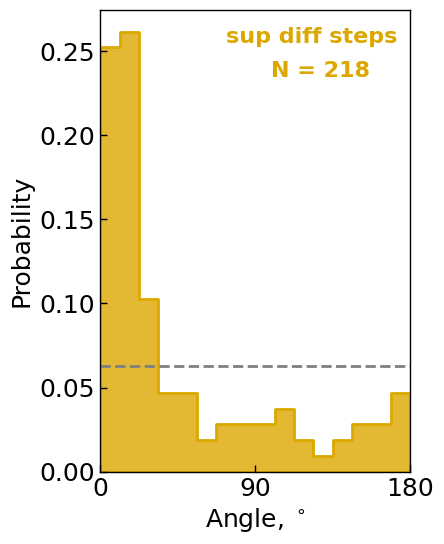

In [3]:
# Initialize a DataFrame to store all flagged data
all_flagged_df = pd.DataFrame()

# Process each selected file
for csv_file in track(csv_files, description="Processing CSV files"):
    df = pd.read_csv(csv_file)
    df['step_flag'] = df['step_flag'].astype(str).str.upper() == 'TRUE'
    
    # Filter for flagged tracks
    flagged_df = df[df['step_flag']]
    
    # Concatenate the flagged data
    all_flagged_df = pd.concat([all_flagged_df, flagged_df], ignore_index=True)

# Define an angle calculation function
def calc_angle(x, y):
    x0 = x[:-1]
    x1 = x[1:]
    y0 = y[:-1]
    y1 = y[1:]
    vector = np.array([x1 - x0, y1 - y0])
    vector_complex = 1j * vector[1, :] + vector[0, :]
    angles_eachstep = np.angle(vector_complex, deg=True)
    angles = np.ediff1d(angles_eachstep)
    angles[angles < -180] += 360
    angles[angles > 180] -= 360
    return angles

all_angles = []
total_flagged_steps = 0  # Initialize a counter for the total number of steps

for track_id in all_flagged_df['trackID'].unique():
    track_data = all_flagged_df[all_flagged_df['trackID'] == track_id]
    
    # Extract the x, y coordinates where step_flag is True
    x = track_data['x'].values
    y = track_data['y'].values
    step_flags = track_data['step_flag'].values
    
    # Identify segments of consecutive TRUEs
    i = 0
    while i < len(step_flags):
        # Start counting a segment when a TRUE is found
        if step_flags[i]:
            start_index = i
            while i < len(step_flags) and step_flags[i]:  # Continue until FALSE
                i += 1
            # Calculate number of consecutive TRUEs
            length_of_segment = i - start_index
            if length_of_segment > 1:
                # Calculate angles for this segment and count steps
                segment_x = x[start_index:i]
                segment_y = y[start_index:i]
                angles = calc_angle(segment_x, segment_y)
                all_angles.extend(np.abs(angles))
                # Explicitly calculate the number of steps as length_of_segment - 1
                total_flagged_steps += (length_of_segment - 1)
        else:
            i += 1

# Check if there are any steps
if total_flagged_steps == 0:
    print("No flagged steps found. Please check your data.")
else:
    # Plot the angle distribution
    plt.figure(figsize=(4, 6))
    bins = 16
    ax = sns.histplot(
        x=all_angles,
        bins=bins,
        stat="probability",
        common_norm=False,
        binrange=(0, 180),
        lw=2,
        element="step",
        fill=True,
        alpha=0.8,
        color="#dca800"
    )
    
    plt.axhline(1 / bins, ls="--", c="gray", lw=2)
    
    # Add custom annotations with the total flagged steps count
    text_x_position = 73
    text_y_position = 0.255  
    ax.text(
        text_x_position, 
        text_y_position, 
        "sup diff steps", 
        color="#dca800", 
        weight="bold", 
        size=16
    )
    ax.text(
        99, 
        text_y_position - 0.02,  
        f"N = {total_flagged_steps:,}",  # Display the number of steps
        color="#dca800", 
        weight="bold", 
        size=16
    )

    plt.xlim(0, 180)
    plt.xticks([0, 90, 180])
    plt.ylim(0, None)
    plt.xlabel("Angle, $^\circ$", fontsize=18)
    plt.ylabel("Probability", fontsize=18)
    ax.spines[:].set_linewidth(1)
    ax.tick_params(
        axis="both",
        which="major",
        labelsize=18,
        direction="in",
        bottom=True,
        left=True,
        length=5,
        width=1,
    )
    ax.set_axisbelow(False)
    plt.savefig("angle_histo_flagged_steps.png", format="png", bbox_inches="tight", dpi=600)
    plt.show()

Output()

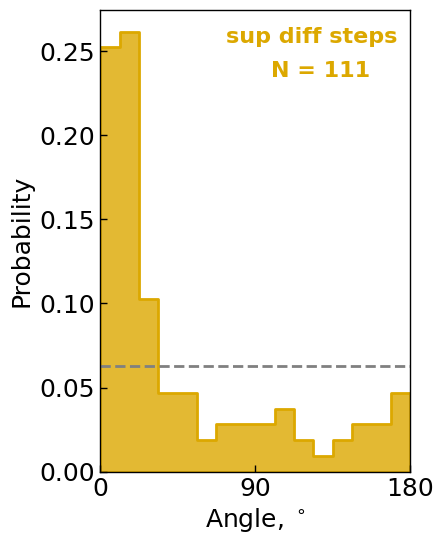

In [5]:
# Initialize a DataFrame to store all flagged data
all_flagged_df = pd.DataFrame()

# Set to keep track of all unique flagged trackIDs
unique_track_ids = set()

# Process each selected file
for csv_file in track(csv_files, description="Processing CSV files"):
    df = pd.read_csv(csv_file)
    df['step_flag'] = df['step_flag'].astype(str).str.upper() == 'TRUE'
    
    # Filter for flagged tracks
    flagged_df = df[df['step_flag']]
    
    # Update the set of unique trackIDs
    unique_track_ids.update(flagged_df['trackID'].unique())
    
    # Concatenate the flagged data
    all_flagged_df = pd.concat([all_flagged_df, flagged_df], ignore_index=True)

# Calculate total unique flagged trackIDs
total_flagged_tracks = len(unique_track_ids)

if total_flagged_tracks == 0:
    print("No flagged steps found. Please check your data.")
else:
    # Define an angle calculation function
    def calc_angle(x, y):
        x0 = x[:-1]
        x1 = x[1:]
        y0 = y[:-1]
        y1 = y[1:]
        vector = np.array([x1 - x0, y1 - y0])
        vector_complex = 1j * vector[1, :] + vector[0, :]
        angles_eachstep = np.angle(vector_complex, deg=True)
        angles = np.ediff1d(angles_eachstep)
        angles[angles < -180] += 360
        angles[angles > 180] -= 360
        return angles

    all_angles = []
    for track_id in unique_track_ids:
        track_data = all_flagged_df[all_flagged_df['trackID'] == track_id]
        x = track_data['x'].values
        y = track_data['y'].values
        angles = calc_angle(x, y)
        all_angles.extend(np.abs(angles))

    # Plot the angle distribution
    plt.figure(figsize=(4, 6))
    bins = 16
    ax = sns.histplot(
        x=all_angles,
        bins=bins,
        stat="probability",
        common_norm=False,
        binrange=(0, 180),
        lw=2,
        element="step",
        fill=True,
        alpha=0.8,
        color="#dca800"
    )
    
    plt.axhline(1 / bins, ls="--", c="gray", lw=2)

    # Add custom annotations with the total flagged tracks count
    text_x_position = 73
    text_y_position = 0.255  
    ax.text(
        text_x_position, 
        text_y_position, 
        "sup diff steps", 
        color="#dca800", 
        weight="bold", 
        size=16
    )
    ax.text(
        99, 
        text_y_position - 0.02,  
        f"N = {total_flagged_tracks:,}", 
        color="#dca800", 
        weight="bold", 
        size=16
    )

    plt.xlim(0, 180)
    plt.xticks([0, 90, 180])
    plt.ylim(0, None)
    plt.xlabel("Angle, $^\circ$", fontsize=18)
    plt.ylabel("Probability", fontsize=18)
    ax.spines[:].set_linewidth(1)
    ax.tick_params(
        axis="both",
        which="major",
        labelsize=18,
        direction="in",
        bottom=True,
        left=True,
        length=5,
        width=1,
    )
    ax.set_axisbelow(False)
    plt.savefig("angle_histo_flagged_steps.png", format="png", bbox_inches="tight", dpi=600)
    plt.show()

## Alpha and angle distribution of the whole flagged tracks

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tkinter import filedialog
from rich.progress import track

In [8]:
csv_files = filedialog.askopenfilenames(
    title="Select CSV File with Step Flags",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

Output()

Total tracks: 12567
Filtered tracks: 111


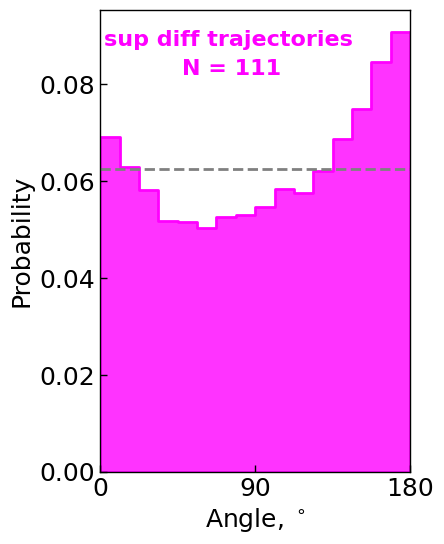

In [6]:
# Initialize a DataFrame to store all flagged data for angle calculations
all_flagged_df = pd.DataFrame()

# Set to keep track of all unique flagged trackIDs
unique_flagged_track_ids = set()

# Process each selected file
total_tracks = 0

for csv_file in track(csv_files, description="Processing CSV files"):
    df = pd.read_csv(csv_file)
    
    # Ensure step_flag column is in a proper boolean format
    df['step_flag'] = df['step_flag'].astype(str).str.upper() == 'TRUE'
    
    # Get the track IDs that have at least one TRUE flag
    flagged_track_ids = df[df['step_flag']]['trackID'].unique()
    
    # Update the set of unique trackIDs
    unique_flagged_track_ids.update(flagged_track_ids)
    
    # Filter the dataframe to include all steps of flagged tracks
    flagged_tracks_df = df[df['trackID'].isin(flagged_track_ids)]
    
    # Append to the master DataFrame for angle calculations
    all_flagged_df = pd.concat([all_flagged_df, flagged_tracks_df], ignore_index=True)
    
    # Update total track count
    total_tracks += len(df['trackID'].unique())

# Calculate the number of unique flagged trackIDs
filtered_tracks = len(unique_flagged_track_ids)

# Display track counts
print(f"Total tracks: {total_tracks}")
print(f"Filtered tracks: {filtered_tracks}")

# Function to calculate angles
def calc_angle(x, y):
    x0 = x[:-1]
    x1 = x[1:]
    y0 = y[:-1]
    y1 = y[1:]
    vector = np.array([x1 - x0, y1 - y0])
    vector_complex = 1j * vector[1, :] + vector[0, :]
    angles_eachstep = np.angle(vector_complex, deg=True)
    angles = np.ediff1d(angles_eachstep)
    angles[angles < -180] += 360
    angles[angles > 180] -= 360
    return angles

all_angles = []
for track_id in unique_flagged_track_ids:
    track_data = all_flagged_df[all_flagged_df['trackID'] == track_id]
    x = track_data['x'].values
    y = track_data['y'].values
    angles = calc_angle(x, y)
    all_angles.extend(np.abs(angles))

# Create a DataFrame for the angle data
angle_data = pd.DataFrame({'angle': all_angles})

# Plot the angle distribution
plt.figure(figsize=(4, 6))
bins = 16
ax = sns.histplot(
    data=angle_data,
    x="angle",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    alpha=0.8,
    color="magenta"
)

plt.axhline(1 / bins, ls="--", c="gray", lw=2)

# Add custom annotations
text_x_position = 2
text_y_position = 0.088 
ax.text(
    text_x_position,
    text_y_position,
    "sup diff trajectories",
    color="magenta",
    weight="bold",
    size=16
)
ax.text(
    47.5,
    0.082,  
    f"N = {filtered_tracks:,}",
    color="magenta",
    weight="bold",
    size=16
)

plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, None)
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)
ax.spines[:].set_linewidth(1)
ax.tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
ax.set_axisbelow(False)
plt.savefig("angle_histo_flagged_tracks.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
from rich.progress import track

sns.set(color_codes=True, style="white")

In [2]:
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [3]:
def calc_angle(x, y):
    x0 = x[:-1]
    x1 = x[1:]
    y0 = y[:-1]
    y1 = y[1:]
    vector = np.array([x1 - x0, y1 - y0])
    vector_complex = 1j * vector[1, :] + vector[0, :]
    angles_eachstep = np.angle(vector_complex, deg=True)
    angles = np.ediff1d(angles_eachstep)
    angles[angles < -180] += 360
    angles[angles > 180] -= 360
    return angles

In [4]:
# Initialize variables to store angle values for different categories
all_angles_all_tracks = []
all_angles_flagged_tracks = []
all_angles_flagged_steps = []

# Process each selected file
for csv_file in track(csv_files):
    df = pd.read_csv(csv_file)
    df['step_flag'] = df['step_flag'].astype(str).str.upper() == 'TRUE'
    
    track_ids = df['trackID'].unique()
    flagged_track_ids = df[df['step_flag']]['trackID'].unique()
    
    # Calculate angles for all tracks
    for track_id in track_ids:
        track_data = df[df['trackID'] == track_id]
        x = track_data['x'].values
        y = track_data['y'].values
        angles = calc_angle(x, y)
        all_angles_all_tracks.extend(np.abs(angles))
    
    # Calculate angles for flagged tracks
    flagged_tracks_df = df[df['trackID'].isin(flagged_track_ids)]
    for track_id in flagged_track_ids:
        track_data = flagged_tracks_df[flagged_tracks_df['trackID'] == track_id]
        x = track_data['x'].values
        y = track_data['y'].values
        angles = calc_angle(x, y)
        all_angles_flagged_tracks.extend(np.abs(angles))
    
    # Calculate angles for flagged steps
    flagged_steps_df = df[df['step_flag']]
    for track_id in flagged_steps_df['trackID'].unique():
        track_data = flagged_steps_df[flagged_steps_df['trackID'] == track_id]
        x = track_data['x'].values
        y = track_data['y'].values
        angles = calc_angle(x, y)
        all_angles_flagged_steps.extend(np.abs(angles))


Output()

In [5]:
# Create DataFrames for each angle data
angle_data_all_tracks = pd.DataFrame({'angle': all_angles_all_tracks, 'Category': 'All Tracks'})
angle_data_flagged_tracks = pd.DataFrame({'angle': all_angles_flagged_tracks, 'Category': 'Flagged Tracks'})
angle_data_flagged_steps = pd.DataFrame({'angle': all_angles_flagged_steps, 'Category': 'Flagged Steps'})
# Combine all DataFrames
combined_angle_data = pd.concat([angle_data_all_tracks, angle_data_flagged_tracks, angle_data_flagged_steps], ignore_index=True)


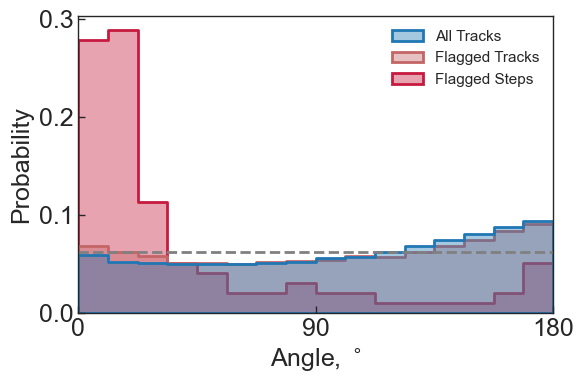

In [8]:
# Plotting
plt.figure(figsize=(6, 4))
bins = 16
ax = sns.histplot(
    data=combined_angle_data,
    x="angle",
    hue="Category",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette={"All Tracks": "#1f77b4", "Flagged Tracks": "#c46666", "Flagged Steps": "#c61a3e"}
)

# Customize and annotate the plot
plt.axhline(1 / bins, ls="--", c="gray", lw=2)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)

# Customize the legend
legend = ax.get_legend()
if legend is not None:
    legend.set_title(None)
    legend_frame = legend.get_frame()
    legend_frame.set_visible(False)

# Final layout adjustments and saving
plt.tight_layout()
plt.savefig("angle_histo_combined.png", format="png", bbox_inches="tight", dpi=300)
plt.show()